In [ ]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
y1 = np.array([0,1,2])
tau = np.array([0,1,0])
y2 = np.array([1.5,3,4])
y3 = np.array([3.5,5,5])


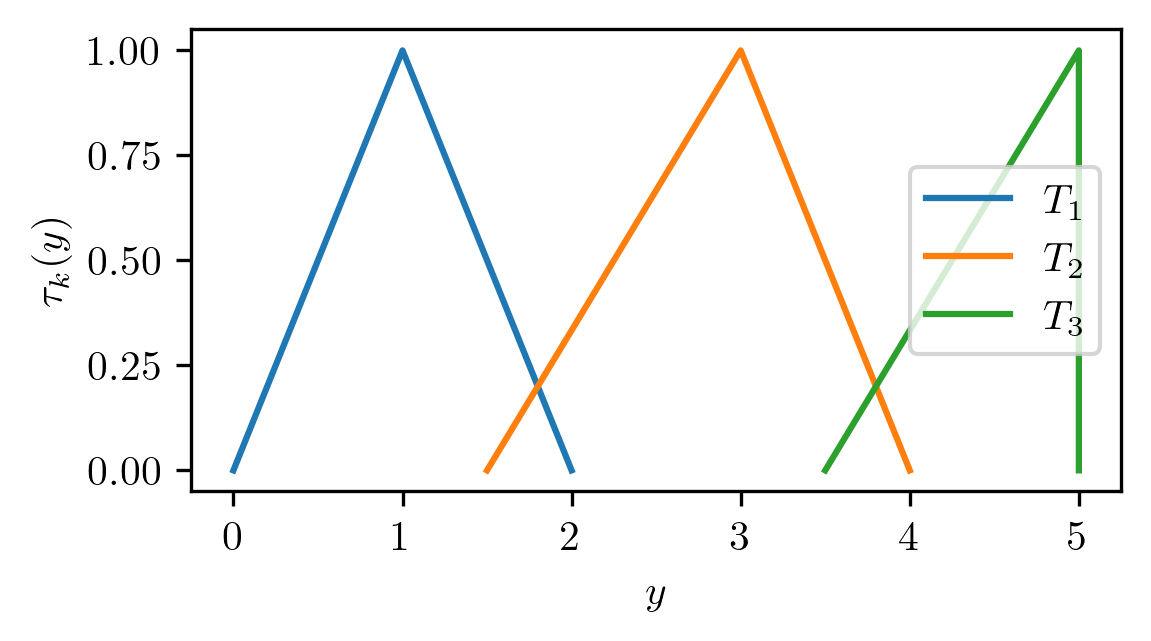

In [3]:
plt.rcParams['text.usetex'] = True

fig, ax = plt.subplots(figsize=(4, 2), dpi=300)
ax.plot(y1, tau, y2, tau, y3, tau)
ax.legend(['$T_{1}$', '$T_{2}$', '$T_{3}$'])
ax.set_ylabel('$\\tau_{k}(y)$')
ax.set_xlabel('$y$')
plt.show()

In [17]:
import networkx as nx

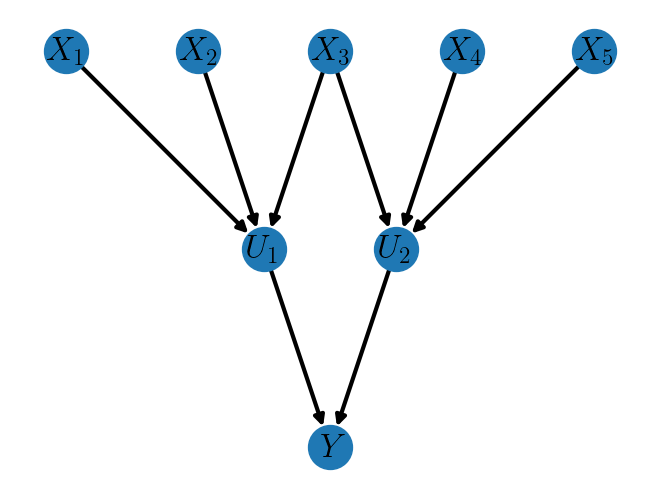

In [21]:
G = nx.DiGraph()
G.add_edge("$U_{1}$", "$Y$")
G.add_edge("$U_{2}$", "$Y$")
G.add_edge("$X_{1}$", "$U_{1}$")
G.add_edge("$X_{2}$", "$U_{1}$")
G.add_edge("$X_{3}$", "$U_{1}$")
G.add_edge("$X_{3}$", "$U_{2}$")
G.add_edge("$X_{4}$", "$U_{2}$")
G.add_edge("$X_{5}$", "$U_{2}$")
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw(G,with_labels=True,  pos=pos, font_size= 24, node_size=1000, width=3, arrowsize=15)

In [22]:
import ranky

In [23]:
M = 10

In [24]:
r = np.arange(M)

In [25]:
rnd = np.random.RandomState(1)

In [26]:
rnd.shuffle(r)

In [28]:
# r = [1, 8, 2, 3, 6, 5, 0, 4, 9, 7]
r

array([2, 9, 6, 4, 0, 3, 1, 7, 8, 5])

In [29]:
A = np.zeros((M,M))
for i in range(M):
  for j in range(M):
    if r[i]>=r[j]:
      A[i,j] = 1

In [30]:
A

array([[1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 1., 1., 1., 1., 0., 0., 1.]])

In [31]:
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

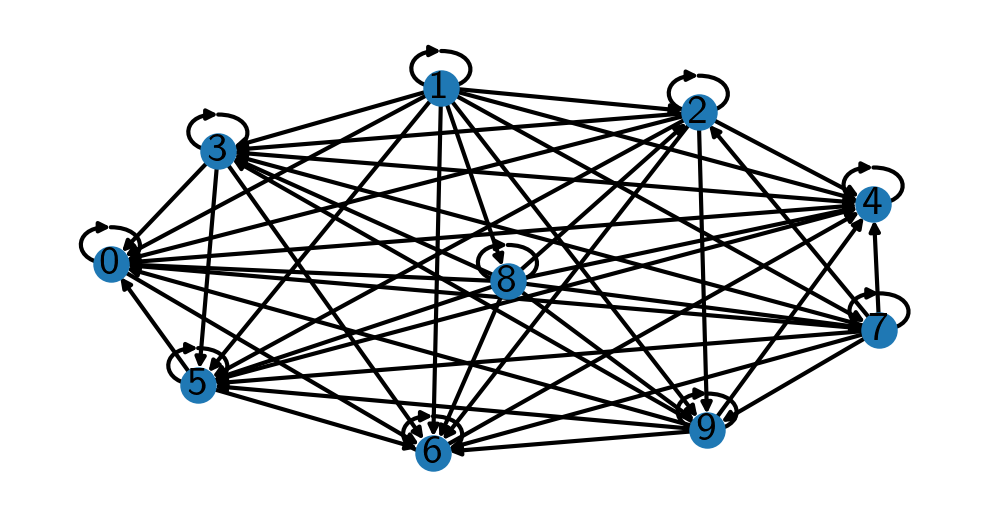

In [36]:
fig, ax = plt.subplots(figsize=(4, 2), dpi=300)
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
nx.draw(G, with_labels=True, font_weight='bold', font_size= 10, node_size=60, width=1, arrowsize=5, pos=pos)

In [ ]:
A1 = A + np.random.normal(0, 0.1, (M,M))

In [ ]:
A1[A1<0] = 0
A1[A1>1] = 1

In [ ]:
A1[np.eye(M,M)==1] = 1

In [ ]:
A1

In [ ]:
A2 = np.zeros((M,M))
teta = 0.9
A2[A1>teta] = 1
A2

In [ ]:
A2-A

In [ ]:
A[np.eye(M,M)==1] = 0
G = nx.from_numpy_array(A, create_using=nx.DiGraph)

In [ ]:
nx.is_directed_acyclic_graph(G)

In [ ]:
A2[np.eye(M,M)==1] = 0
G = nx.from_numpy_array(A2, create_using=nx.DiGraph)

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold', font_size= 10, node_size=500, width=3, arrowsize=10)

In [ ]:
nx.is_directed_acyclic_graph(G)

In [ ]:
AA = []
i = 1
fig, ax = plt.subplots(figsize=(4, 2), dpi=300)


for teta in np.arange(0.6,1.0,0.1):
  AB = np.zeros((M,M))
  AB[A1>teta] = 1
  AB[np.eye(M,M)==1] = 0
  G = nx.from_numpy_array(AB, create_using=nx.DiGraph)
  plt.subplot(220+i)
  nx.draw(G, with_labels=True, font_size= 8, node_size=30, width=0.5, arrowsize=5, pos=nx.circular_layout(G))
  AA.append(AB)
  i += 1
plt.show()

In [9]:
AA = []
#fig, ax = plt.subplots(figsize=(4, 2), dpi=300)

for i in range(1,5):
  AB = A + np.random.normal(0, 0.1, (M,M))
  AB[AB<0] = 0
  AB[AB>1] = 1
  BB = np.array(AB)
  BB[BB<0.9] = 0
  BB[np.eye(M,M)==1] = 0
  #G = nx.from_numpy_array(BB, create_using=nx.DiGraph)
  #plt.subplot(220+i)
  #nx.draw(G, with_labels=True, font_size= 7, node_size=30, width=0.5, arrowsize=5, pos=nx.circular_layout(G))
  AA.append(AB)
#plt.show()

In [10]:
for a in AA:
  a[np.eye(M,M)==1]=1

In [11]:
from itertools import combinations, permutations

In [33]:
cc = []
bbest_rank = []
for teta in np.arange(0.4,1.0,0.1):
  bb = []
  for a in AA:
    b = np.array(a)
    b[b >= teta] = 1
    b[b < teta] = 0
    bb.append(b)
  min_dist = np.inf
  best_rank = None
  for candidate_rank in permutations(range(M)):
    mm = np.zeros((M,M))
    for i in range(M):
      for j in range(M):
        if candidate_rank[i]>=candidate_rank[j]:
          mm[i,j] = 1
    for b in bb:
      c = np.sum(np.abs(b - mm))
      if min_dist > c:
        min_dist = c
        best_rank = mm
  print(c, (M*M - c - c)/M*M, best_rank)
  cc.append(c)
  bbest_rank.append(best_rank)

58.0 -16.0 [[1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 1.]]
58.0 -16.0 [[1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 1.]]
58.0 -16.0 [[1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 

In [20]:
for i in range(M):
    for j in range(M):
        k = 0
        for teta in np.arange(0.4,1.0,0.1):
            print(teta)
            if bbest_rank[k][i,j] != bbest_rank[k+1][i,j]:
                print(i,j,bbest_rank[k], bbest_rank[k+1], teta)
            k += 1 
    

0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999


IndexError: list index out of range

In [22]:
bbest_rank[-1]

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 0., 1., 1., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 0., 1.]])

In [23]:
A

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 0., 1., 1., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 1., 0., 0., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 0., 1.]])

In [24]:
A - bbest_rank[-1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
import networkx as nx


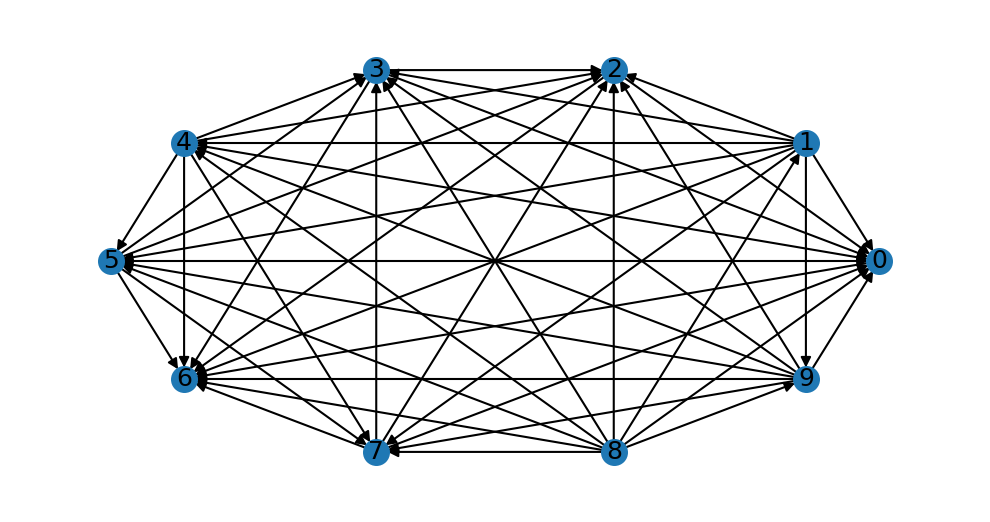

In [31]:
lb = np.array(bbest_rank[-1])
lb[np.eye(M,M)==1]=0
fig, ax = plt.subplots(figsize=(4, 2), dpi=300)
G = nx.from_numpy_array(lb, create_using=nx.DiGraph)
nx.draw(G, with_labels=True, font_size= 6, node_size=30, width=0.5, arrowsize=5, pos=nx.circular_layout(G))
plt.savefig("fig4.png", format="PNG")
